<a href="https://colab.research.google.com/github/sardarmoneeb/Machine-Learning/blob/main/Brain_Tumour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install opendatasets

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
!mkdir -p ~/.kaggle
!echo '{"username":"moneebmushtaq","key":"c1f6ce51e419fb83150e12207494ed73"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [8]:
!pip install kaggle
!kaggle datasets list


ref                                                            title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset   Global Earthquake-Tsunami Risk Assessment Dataset        16151  2025-10-01 16:35:53.273000          14161        478  1.0              
jockeroika/life-style-data                                     Life Style Data                                        3995645  2025-10-14 13:50:45.303000          16638        346  0.8235294        
jaderz/hospital-beds-management                                Hospital Beds Management                                 47583  2025-10-03 09:21:58.590000          11628        296  1.0              
alams

In [10]:
# Step 4: Download the dataset (✅ correct command)
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection -p /content/drive/MyDrive/brain-tumer-cnn-97


Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
  0% 0.00/15.1M [00:00<?, ?B/s]
100% 15.1M/15.1M [00:00<00:00, 233MB/s]


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Step 5: Unzip the dataset
!unzip /content/drive/MyDrive/brain-tumer-cnn-97/brain-mri-images-for-brain-tumor-detection.zip -d /content/drive/MyDrive/brain-tumer-cnn-97


Archive:  /content/drive/MyDrive/brain-tumer-cnn-97/brain-mri-images-for-brain-tumor-detection.zip
  inflating: /content/drive/MyDrive/brain-tumer-cnn-97/brain_tumor_dataset/no/1 no.jpeg  
  inflating: /content/drive/MyDrive/brain-tumer-cnn-97/brain_tumor_dataset/no/10 no.jpg  
  inflating: /content/drive/MyDrive/brain-tumer-cnn-97/brain_tumor_dataset/no/11 no.jpg  
  inflating: /content/drive/MyDrive/brain-tumer-cnn-97/brain_tumor_dataset/no/12 no.jpg  
  inflating: /content/drive/MyDrive/brain-tumer-cnn-97/brain_tumor_dataset/no/13 no.jpg  
  inflating: /content/drive/MyDrive/brain-tumer-cnn-97/brain_tumor_dataset/no/14 no.jpg  
  inflating: /content/drive/MyDrive/brain-tumer-cnn-97/brain_tumor_dataset/no/15 no.jpg  
  inflating: /content/drive/MyDrive/brain-tumer-cnn-97/brain_tumor_dataset/no/17 no.jpg  
  inflating: /content/drive/MyDrive/brain-tumer-cnn-97/brain_tumor_dataset/no/18 no.jpg  
  inflating: /content/drive/MyDrive/brain-tumer-cnn-97/brain_tumor_dataset/no/19 no.jpg  
 

In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [15]:
data_dir = "/content/drive/MyDrive/brain-tumer-cnn-97/brain_tumor_dataset"
print(os.listdir(data_dir))  # should show folders like 'yes' and 'no'


['no', 'yes']


In [17]:
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):  # ensure it's a folder
        print(f"{folder}: {len(os.listdir(folder_path))} images")


no: 98 images
yes: 155 images


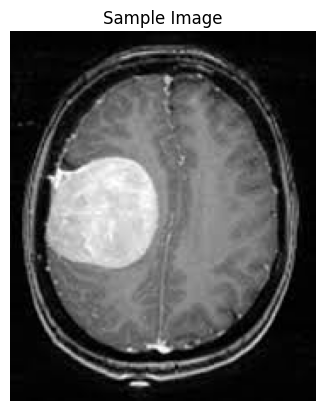

In [18]:
sample_img_path = os.path.join(data_dir, "yes", os.listdir(os.path.join(data_dir, "yes"))[0])
img = cv2.imread(sample_img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Sample Image")
plt.axis("off")
plt.show()


In [19]:
print("Image shape:", img.shape)


Image shape: (218, 180, 3)


In [20]:
heights, widths = [], []

for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            h, w, _ = img.shape
            heights.append(h)
            widths.append(w)

print("Average height:", np.mean(heights))
print("Average width:", np.mean(widths))


Average height: 386.0197628458498
Average width: 354.2371541501976


In [34]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization


In [35]:
data_dir = "/content/drive/MyDrive/brain-tumer-cnn-97/brain_tumor_dataset"
categories = ['yes', 'no']

img_size = 128  # resize all images to 128x128
data = []
labels = []

for category in categories:
    path = os.path.join(data_dir, category)
    label = categories.index(category)  # yes=0, no=1
    for file in os.listdir(path):
        img_path = os.path.join(path, file)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_size, img_size))
            data.append(img)
            labels.append(label)
        except:
            continue

data = np.array(data) / 255.0  # normalize
labels = np.array(labels)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)


Training data: (202, 128, 128, 3)
Testing data: (51, 128, 128, 3)


In [84]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    # brightness_range=[0.6, 1.2]  # Adjust brightness between 80% and 120%
)

datagen.fit(X_train)

# -----------------------------
# 5️⃣ 🔹 Step 3: Add Early Stopping here
# -----------------------------
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,794 (12.61 MB)

 Trainable params: 3,305,346 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [90]:
history = model.fit(X_train, y_train, epochs=22, validation_split=0.3, batch_size=32)


Epoch 1/22
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9946 - loss: 0.0110 - val_accuracy: 0.8033 - val_loss: 0.5074
Epoch 2/22
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9682 - loss: 0.0816 - val_accuracy: 0.8197 - val_loss: 0.4526
Epoch 3/22
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.8361 - val_loss: 0.4175
Epoch 4/22
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9714 - loss: 0.0497 - val_accuracy: 0.8525 - val_loss: 0.3843
Epoch 5/22
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 1.0000 - loss: 0.0080 - val_accuracy: 0.8525 - val_loss: 0.3740
Epoch 6/22
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 1.0000 - loss: 0.0162 - val_accuracy: 0.8689 - val_loss: 0.3614
Epoch 7/22
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9892 - loss: 0.0270 - val_accuracy: 0.8852 - val_loss: 0.3541
Epoch 8/22
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9946 - loss: 0.0199 - val_accuracy: 0.8852 - val_loss: 0.3433
Epoch 9/22
5/

In [91]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Improved Test Accuracy: {test_acc:.2f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - accuracy: 0.7964 - loss: 0.8036
Improved Test Accuracy: 0.80


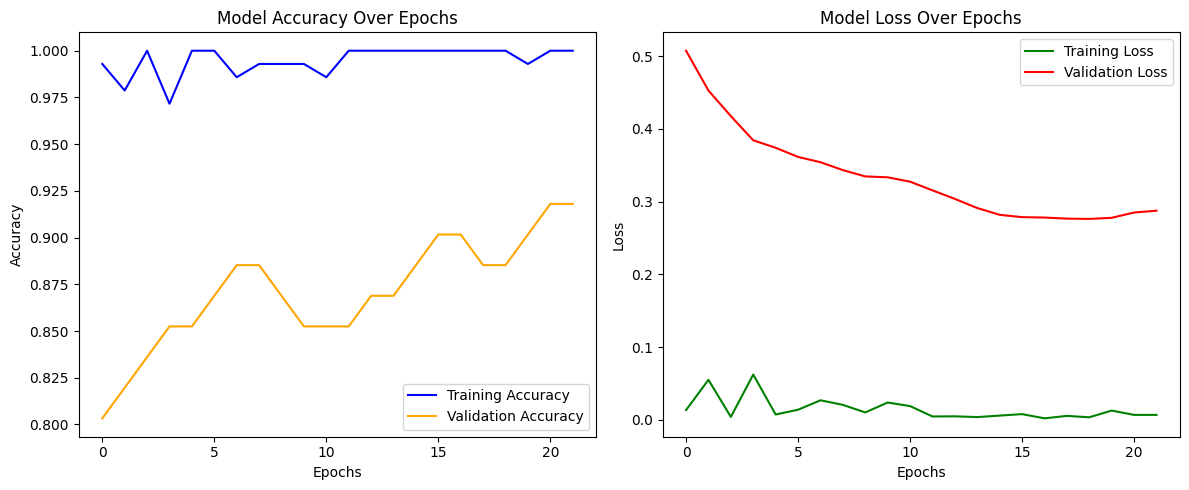

✅ File saved successfully to: /content/drive/MyDrive/model_performance.png


In [92]:
import matplotlib.pyplot as plt

# Create a figure with two plots: Accuracy and Loss
plt.figure(figsize=(12, 5))

# ---- Accuracy plot ----
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# ---- Loss plot ----
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='green')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Adjust spacing
plt.tight_layout()

# ---- Save figure ----
plt.savefig('/content/drive/MyDrive/model_performance.png', dpi=300)

# Show it
plt.show()

print("✅ File saved successfully to: /content/drive/MyDrive/model_performance.png")
